### Question 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython import display

### RGB Color Table

In [3]:
inputRGB = np.array([
    [255,0,0],
    [220,20,60],
    [178,34,34],
    [139,0,0],
    [205,92,92],
    [255,69,0],
    [85,107,47],
    [0,128,0],
    [127,255,0],
    [46,139,87],
    [102,205,170],
    [0,0,255],
    [0,0,139],
    [135,206,250],
    [0,191,255],
    [95,158,160],
    [65,105,225],
    [255,255,224],
    [255,228,181],
    [245,222,179],
    [255,255,0],
    [255,215,0],
    [0,128,128],
    [0,255,255]
])

calibrate the color codes to values between 0 and 1, instead of being between 0 and 255

(24, 3)


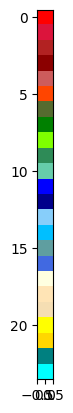

In [4]:
normRGB = inputRGB/255
plt.imshow(np.reshape(normRGB,(normRGB.shape[0],1,3)))
print(normRGB.shape)

Initialize all parameters according to the specification except sigma(0) which is set to 10 instead of 1 for better performance. 

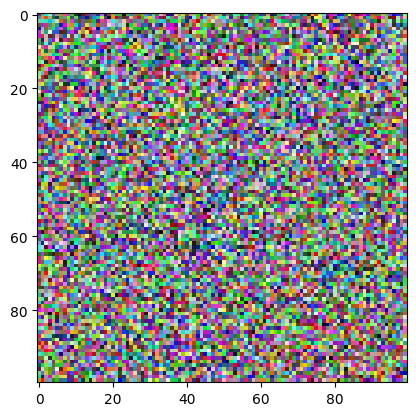

In [5]:
space_size = 100 # 100 x 100 grid of neurons
alpha_0 = 0.8
sigma_0 = 10
max_epochs = 1000

# Initialize random weights
w = np.random.random((space_size,space_size,3))

# Generate a figure of the original grid (randomly selected) 
plt.imshow(w)

### 2.a 

Epoch Number: 20


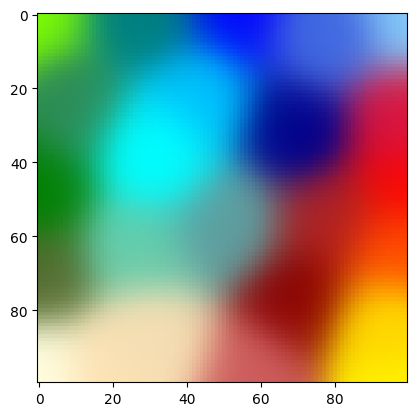

Epoch Number: 40


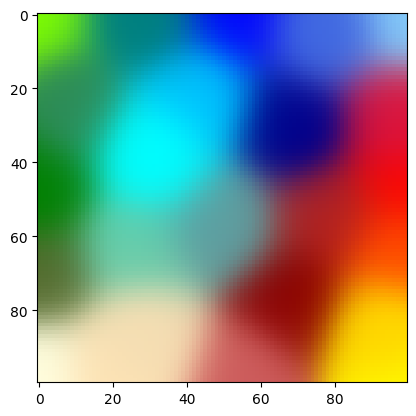

Epoch Number: 100


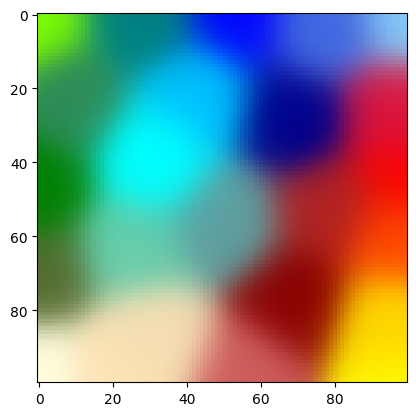

Epoch Number: 1000


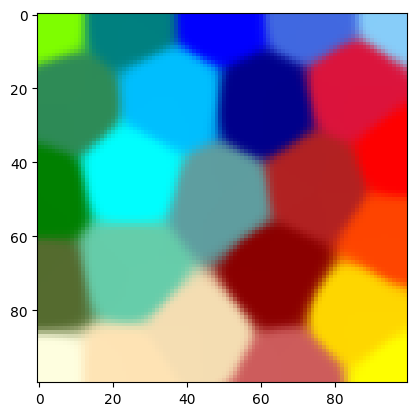

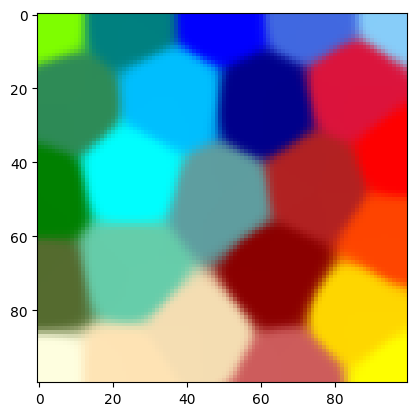

In [6]:
epoch = 1
alpha = alpha_0
sigma = sigma_0

while epoch <= max_epochs:
    for x in normRGB:
        # calculate performance index
        diff = np.linalg.norm(x - w, axis = 2)
        # find index of winning node (I = min||x-w||)
        ind = np.unravel_index(np.argmin(diff, axis=None), diff.shape)

        # Update weights for neighbourhood
        for i in range(0, space_size):
            for j in range(0 ,space_size):
                # 𝑑𝑖,𝑗 is the euclidean distance between winning node i and surrounding node j.
                d = math.sqrt((ind[0]-i)**2 + (ind[1]-j)**2)
                # N𝑖,𝑗 is the topolgical neighborhood of the winner node
                N = math.exp(-d**2/(2*(sigma**2)))
                # w(new) = w(old) + alpha*N*(x-w(old))
                w[i][j] += alpha*N*(x-w[i][j])
        
    # Decrease the learning rate and sigma by the given scheme
    alpha = alpha_0 * math.exp(-epoch/max_epochs)
    sigma = sigma_0 * math.exp(-epoch/max_epochs)

    # Generate figures of the SOM grid after 20, 40, 100, 1000 epochs.
    plot_ind = [20, 40, 100, 1000]
    if epoch in plot_ind:
        print("Epoch Number: {}".format(epoch))
        plt.imshow(w)
        display.display(plt.gcf())
    
    epoch += 1

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 6.149552678818614e-07


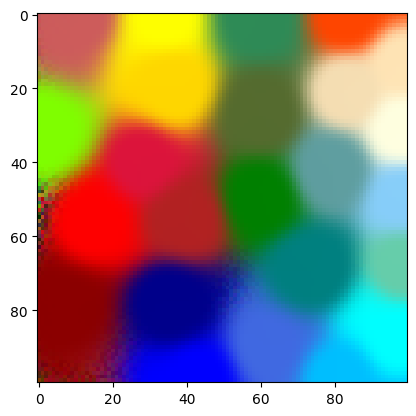

In [8]:
from minisom import MiniSom    
som = MiniSom(100, 100, 3, sigma=10., 
              learning_rate=0.8, 
              neighborhood_function='gaussian')
som.train_random(normRGB, 1000, verbose=True)
plt.imshow(abs(som.get_weights()), interpolation='none')

### 2.b


There are 2 conclusions that we can draw from the here. First, as we increase the value of sigma(0) we can see that the each genereated cluster increase in radius. This is because this value is directly tied to the range of the topological neigbourhood, meaning a small sigma value will lead to only a small neighbourhood having its weight updated. This is why I used an initial sigma value of 10 instead of 1 since the original value is only showing clustering in a very limited range that cannot cover the entire 100x100 grid. Furthermore, as we increase in epoch counts, we can see an increase in clarity of the color segmentation, this is especially apparent between 100 and 1000 epochs. This is expected as a higher training count leads to higher accuracy of the model in general, especially for KSOM since the decrease in learning rate and sigma value as epoch increases allows for fine tuning the boundary between the clusters. 